#  microbiome characteristics of Inflammatory bowel disease (IBD) patients

### Definitions: <br>
Inflammatory Bowel Disease - A term which describes 2 conditions: <br>
1. Crohn's Disease<br>
2. Ulcerative colitis <br><br>

HbA1c -  Blood test that measures the amount of blood sugar (glucose) attached to one's hemoglobin. This provides an indication of how well one's diabetes is being controlled. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

 1. Loading data onto jupyter notebook.

In [3]:
df_users = pd.read_csv('df_users_IBD.csv')
df_users.to_clipboard()
df_users.head()

,Unnamed: 0,patient_id,age,hba1c,gender,bmi,inflammatory_bowel_disease
0,0,1,47.0,5.3,0,25.654372,0
1,1,2,50.0,5.4,0,27.414454,0
2,2,3,35.0,NaN,1,25.510204,0
3,3,4,32.0,NaN,1,24.187046,0
4,4,5,35.0,NaN,1,30.026595,0


In [4]:
mpa_data = pd.read_csv('mpa_data_IBD.csv')
#mpa_data.head(3)

## EDA for df_users
2. Explore the accompanied metadata (Age, HbA1c, BMI distributions) for each study arm

In [5]:
#gives the shape of the Dataframe
df_users.shape

(750, 7)

In [6]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  750 non-null    int64  
 1   patient_id                  750 non-null    int64  
 2   age                         750 non-null    float64
 3   hba1c                       483 non-null    float64
 4   gender                      750 non-null    int64  
 5   bmi                         748 non-null    float64
 6   inflammatory_bowel_disease  750 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 41.1 KB


There is some missing data under for hba1c and for bmi. <br>
All dtypes are numeric (floats and ints), no strings. <br>
The both Unnamed and patient_id appears in both 

In [11]:
df_users.columns

Index(['Unnamed: 0', 'patient_id', 'age', 'hba1c', 'gender', 'bmi',
       'inflammatory_bowel_disease'],
      dtype='object')

In [12]:
df_users.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
round(df_users.describe()).T

,count,mean,std,min,25%,50%,75%,max
patient_id,750.0,376.0,217.0,1.0,188.0,376.0,563.0,750.0
age,750.0,56.0,14.0,18.0,47.0,57.0,68.0,85.0
hba1c,483.0,6.0,1.0,4.0,5.0,6.0,6.0,14.0
gender,750.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
bmi,748.0,28.0,5.0,17.0,24.0,27.0,31.0,48.0
inflammatory_bowel_disease,750.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
df_users.inflammatory_bowel_disease.value_counts(normalize=True)

0    0.758667
1    0.241333
Name: inflammatory_bowel_disease, dtype: float64

About 24% of the sample has IBD. 

In [15]:
# The 0 are the females.
df_users.gender.value_counts(normalize=True)

0    0.670667
1    0.329333
Name: gender, dtype: float64

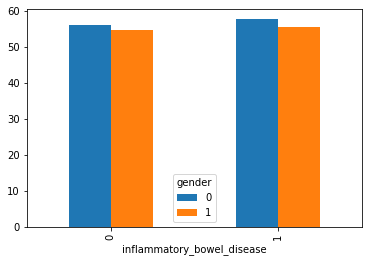

In [16]:
df_users.groupby(['inflammatory_bowel_disease', 'gender']).age.mean().unstack().plot.bar()

There are more females than males in the study but there is good relative balance between the genders in the IBD and healthy sample.

### Below are different distrubution plots which compare the distributions of differnt features in df_users

(-10.0, 100.0)

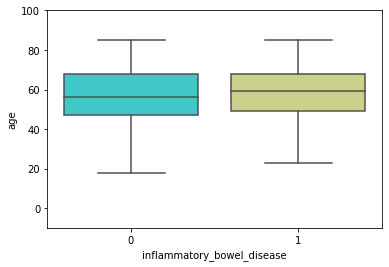

In [17]:
sns.boxplot(x='inflammatory_bowel_disease', y='age', data=df_users, palette='rainbow')
plt.ylim(-10,100)

Age distribution is gaussian among both the sick and the healthy with a median around 60.

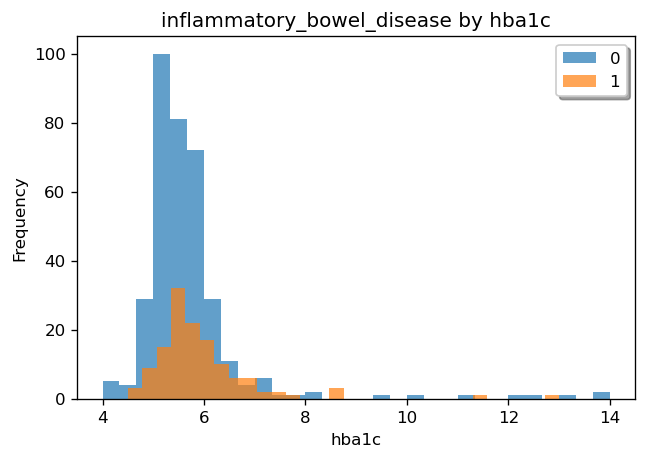

In [18]:
plt.figure(dpi=120)
df_users.groupby('inflammatory_bowel_disease')['hba1c'].plot(kind='hist', bins=30, legend=True,
                                             alpha=0.7, title='inflammatory_bowel_disease by hba1c' )
plt.xlabel('hba1c')
plt.legend(shadow=True, frameon=True)
plt.show()

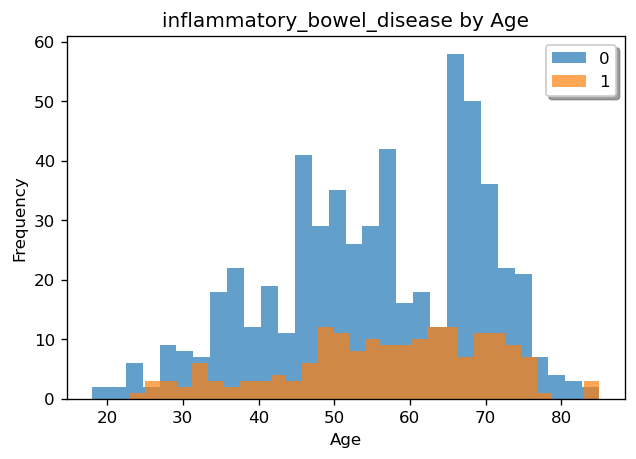

In [19]:
plt.figure(dpi=120)
df_users.groupby('inflammatory_bowel_disease')['age'].plot(kind='hist', bins=30, legend=True,
                                             alpha=0.7, title='inflammatory_bowel_disease by Age' )
plt.xlabel('Age')
plt.legend(shadow=True, frameon=True)
plt.show()

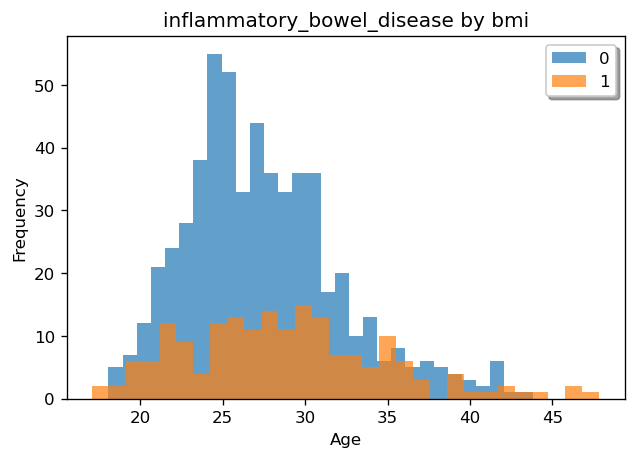

In [20]:
plt.figure(dpi=120)
df_users.groupby('inflammatory_bowel_disease')['bmi'].plot(kind='hist', bins=30, legend=True,
                                             alpha=0.7, title='inflammatory_bowel_disease by bmi' )
plt.xlabel('Age')
plt.legend(shadow=True, frameon=True)
plt.show()

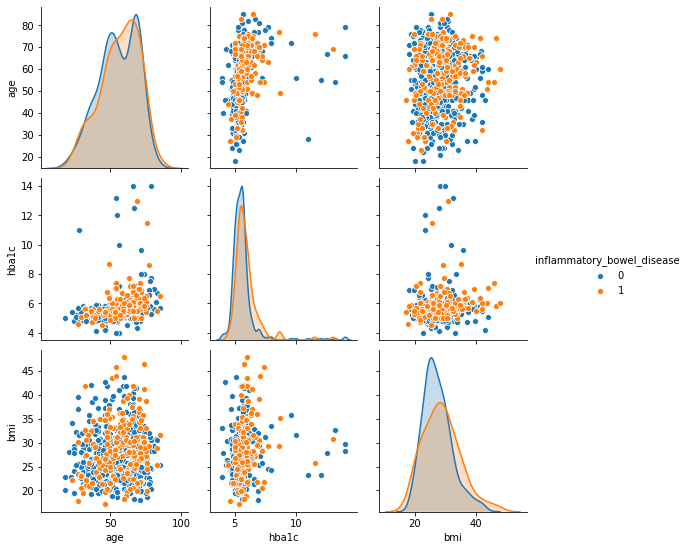

In [21]:
sns.pairplot(df_users[['age', 'hba1c', 'bmi', 'inflammatory_bowel_disease',]], hue='inflammatory_bowel_disease')
plt.show()

### Review where the missing values are in df_users

Text(0.5, 1.0, 'Missing Values Heat Map')

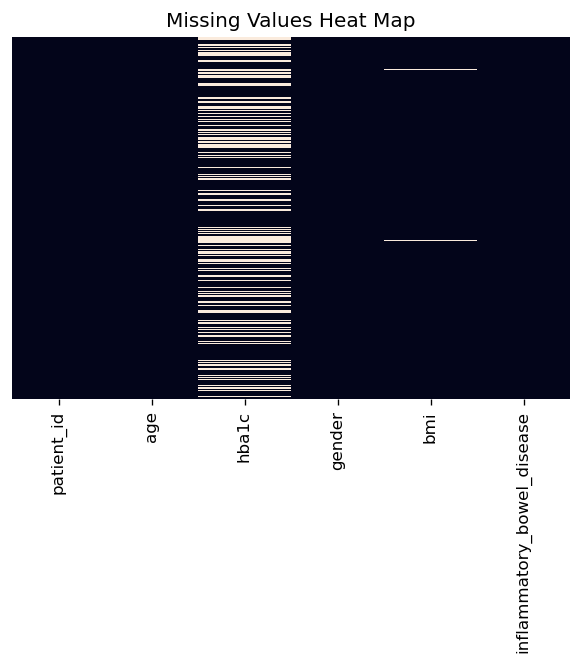

In [22]:
plt.figure(dpi=120)
sns.heatmap(df_users.isnull(), yticklabels=False, cbar=False)
plt.title("Missing Values Heat Map")

good distribution. Could be cleaned a bit. cleaning df_users

## EDA mpa_data

In [7]:
mpa_data.shape

(750, 1514)

In [24]:
mpa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Columns: 1514 entries, Unnamed: 0 to k_bacteria|p_firmicutes|c_bacilli|o_lactobacillales|f_lactobacillaceae|g_lactobacillus|s_lactobacillus_iners
dtypes: float64(1512), int64(2)
memory usage: 8.7 MB


In [25]:
# There is no need for the Unnamed column. The patient ID is enough. 
mpa_data.drop('Unnamed: 0', axis=1, inplace=True)

In [26]:
mpa_data.head()

,patient_id,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_coprococcus,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum|s_subdoligranulum_unclassified,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_clostridiaceae|g_clostridium|s_clostridium_bolteae,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_clostridiaceae|g_clostridium|s_clostridium_bolteae|t_clostridium_bolteae_unclassified,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_blautia|s_ruminococcus_gnavus|t_ruminococcus_gnavus_unclassified,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_blautia|s_ruminococcus_gnavus,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_coprococcus|s_coprococcus_comes,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_coprococcus|s_coprococcus_comes|t_gcf_000155875,...,k_viruses|p_viruses_noname|c_viruses_noname|o_caudovirales|f_podoviridae|g_podoviridae_noname|s_klebsiella_phage_kp34,k_viruses|p_viruses_noname|c_viruses_noname|o_caudovirales|f_siphoviridae|g_siphoviridae_noname|s_bacteroides_phage_b124_14,k_viruses|p_viruses_noname|c_viruses_noname|o_caudovirales|f_podoviridae|g_podoviridae_noname|s_klebsiella_phage_kp34|t_prjna42781,k_viruses|p_viruses_noname|c_viruses_noname|o_caudovirales|f_myoviridae|g_mulikevirus|s_mulikevirus_unclassified,k_bacteria|p_firmicutes|c_bacilli|o_lactobacillales|f_lactobacillaceae|g_lactobacillus|s_lactobacillus_iners|t_lactobacillus_iners_unclassified,k_viruses|p_viruses_noname|c_viruses_noname|o_caudovirales|f_siphoviridae|g_siphoviridae_noname|s_propionibacterium_phage_p104a,k_viruses|p_viruses_noname|c_viruses_noname|o_caudovirales|f_siphoviridae|g_lambdalikevirus|s_enterobacteria_phage_hk633|t_prjna183143,k_viruses|p_viruses_noname|c_viruses_noname|o_caudovirales|f_siphoviridae|g_lambdalikevirus|s_enterobacteria_phage_hk633,k_viruses|p_viruses_noname|c_viruses_noname|o_caudovirales|f_siphoviridae|g_siphoviridae_noname|s_bacteroides_phage_b124_14|t_prjna82753,k_bacteria|p_firmicutes|c_bacilli|o_lactobacillales|f_lactobacillaceae|g_lactobacillus|s_lactobacillus_iners
0,1,0.00000,1.25861,1.25861,0.02931,0.02931,0.00464,0.00464,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
1,2,7.36965,4.01767,4.01767,0.00000,0.00000,0.00000,0.00000,0.31680,0.31680,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
2,3,0.00000,4.93999,4.93999,0.20453,0.20453,0.00693,0.00693,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
3,4,0.28495,16.09870,16.09870,0.00000,0.00000,0.00000,0.00000,0.26235,0.26235,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
4,5,0.52271,13.90959,13.90959,0.00000,0.00000,0.00000,0.00000,0.42154,0.42154,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0


# Filter MPA: removing missing values.

Text(0.5, 1.0, 'Missing Values Heat Map')

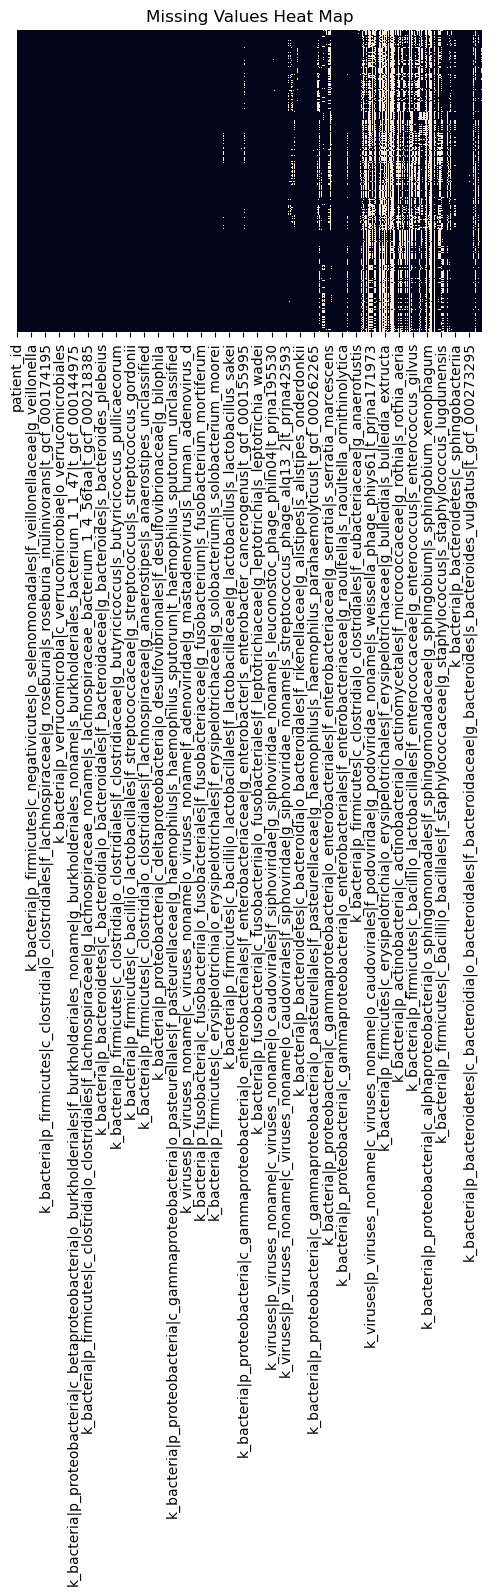

In [27]:
plt.figure(dpi=100)
sns.heatmap(mpa_data.isnull(), yticklabels=False, cbar=False)
plt.title("Missing Values Heat Map")

In [28]:
mpa_new = mpa_data.dropna(axis=1)
mpa_new.head()

,patient_id,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_coprococcus,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum|s_subdoligranulum_unclassified,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_clostridiaceae|g_clostridium|s_clostridium_bolteae,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_clostridiaceae|g_clostridium|s_clostridium_bolteae|t_clostridium_bolteae_unclassified,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_blautia|s_ruminococcus_gnavus|t_ruminococcus_gnavus_unclassified,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_blautia|s_ruminococcus_gnavus,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_coprococcus|s_coprococcus_comes,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_coprococcus|s_coprococcus_comes|t_gcf_000155875,...,k_bacteria|p_spirochaetes|c_spirochaetia|o_spirochaetales|f_spirochaetaceae|g_treponema|s_treponema_succinifaciens|t_gcf_000195275,k_bacteria|p_spirochaetes|c_spirochaetia|o_spirochaetales|f_spirochaetaceae|g_treponema|s_treponema_succinifaciens,k_bacteria|p_spirochaetes|c_spirochaetia|o_spirochaetales|f_spirochaetaceae|g_treponema,k_bacteria|p_spirochaetes|c_spirochaetia|o_spirochaetales|f_spirochaetaceae,k_viruses|p_viruses_noname|c_viruses_noname|o_caudovirales|f_myoviridae|g_mulikevirus,k_viruses|p_viruses_noname|c_viruses_noname|o_caudovirales|f_siphoviridae|g_siphoviridae_noname|s_bacteroides_phage_b124_14,k_viruses|p_viruses_noname|c_viruses_noname|o_caudovirales|f_myoviridae|g_mulikevirus|s_mulikevirus_unclassified,k_viruses|p_viruses_noname|c_viruses_noname|o_caudovirales|f_siphoviridae|g_lambdalikevirus|s_enterobacteria_phage_hk633|t_prjna183143,k_viruses|p_viruses_noname|c_viruses_noname|o_caudovirales|f_siphoviridae|g_lambdalikevirus|s_enterobacteria_phage_hk633,k_viruses|p_viruses_noname|c_viruses_noname|o_caudovirales|f_siphoviridae|g_siphoviridae_noname|s_bacteroides_phage_b124_14|t_prjna82753
0,1,0.00000,1.25861,1.25861,0.02931,0.02931,0.00464,0.00464,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,7.36965,4.01767,4.01767,0.00000,0.00000,0.00000,0.00000,0.31680,0.31680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.00000,4.93999,4.93999,0.20453,0.20453,0.00693,0.00693,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.28495,16.09870,16.09870,0.00000,0.00000,0.00000,0.00000,0.26235,0.26235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.52271,13.90959,13.90959,0.00000,0.00000,0.00000,0.00000,0.42154,0.42154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Mpa_new dataframe has no missing values and now 1167 columns instead of 1514. 
mpa_new.shape

(750, 1167)

Text(0.5, 1.0, 'Missing Values Heat Map')

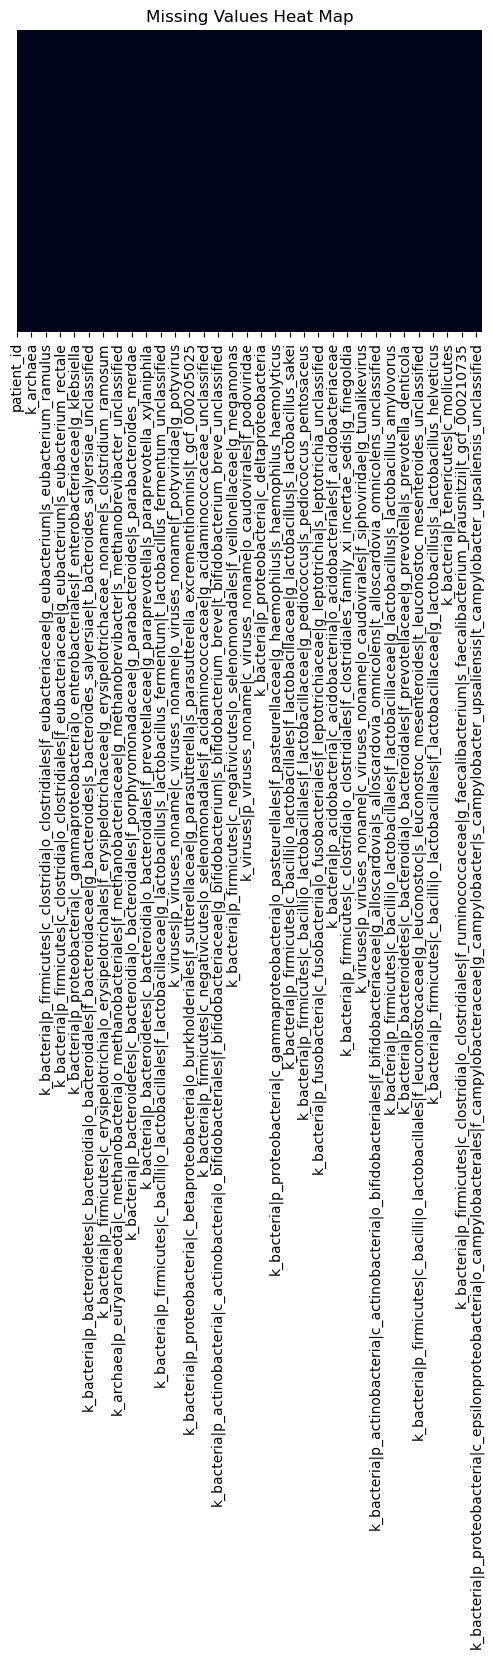

In [30]:
plt.figure(dpi=100)
sns.heatmap(mpa_new.isnull(), yticklabels=False, cbar=False)
plt.title("Missing Values Heat Map")

Normalize MPA data

In [31]:
mpa_col = mpa_new.columns
mpa_col.to_list()
len(mpa_col)

1167

In [32]:
from sklearn import preprocessing

d = preprocessing.normalize(mpa_new)
mpa_scaled = pd.DataFrame(d, columns=mpa_col)
mpa_scaled.head(10)




,patient_id,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_coprococcus,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum|s_subdoligranulum_unclassified,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_clostridiaceae|g_clostridium|s_clostridium_bolteae,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_clostridiaceae|g_clostridium|s_clostridium_bolteae|t_clostridium_bolteae_unclassified,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_blautia|s_ruminococcus_gnavus|t_ruminococcus_gnavus_unclassified,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_blautia|s_ruminococcus_gnavus,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_coprococcus|s_coprococcus_comes,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_coprococcus|s_coprococcus_comes|t_gcf_000155875,...,k_bacteria|p_spirochaetes|c_spirochaetia|o_spirochaetales|f_spirochaetaceae|g_treponema|s_treponema_succinifaciens|t_gcf_000195275,k_bacteria|p_spirochaetes|c_spirochaetia|o_spirochaetales|f_spirochaetaceae|g_treponema|s_treponema_succinifaciens,k_bacteria|p_spirochaetes|c_spirochaetia|o_spirochaetales|f_spirochaetaceae|g_treponema,k_bacteria|p_spirochaetes|c_spirochaetia|o_spirochaetales|f_spirochaetaceae,k_viruses|p_viruses_noname|c_viruses_noname|o_caudovirales|f_myoviridae|g_mulikevirus,k_viruses|p_viruses_noname|c_viruses_noname|o_caudovirales|f_siphoviridae|g_siphoviridae_noname|s_bacteroides_phage_b124_14,k_viruses|p_viruses_noname|c_viruses_noname|o_caudovirales|f_myoviridae|g_mulikevirus|s_mulikevirus_unclassified,k_viruses|p_viruses_noname|c_viruses_noname|o_caudovirales|f_siphoviridae|g_lambdalikevirus|s_enterobacteria_phage_hk633|t_prjna183143,k_viruses|p_viruses_noname|c_viruses_noname|o_caudovirales|f_siphoviridae|g_lambdalikevirus|s_enterobacteria_phage_hk633,k_viruses|p_viruses_noname|c_viruses_noname|o_caudovirales|f_siphoviridae|g_siphoviridae_noname|s_bacteroides_phage_b124_14|t_prjna82753
0,0.004951,0.000000,0.006231,0.006231,0.000145,0.000145,0.000023,0.000023,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.011744,0.043274,0.023592,0.023592,0.000000,0.000000,0.000000,0.000000,0.001860,0.001860,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.020732,0.000000,0.034139,0.034139,0.001413,0.001413,0.000048,0.000048,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.021186,0.001509,0.085267,0.085267,0.000000,0.000000,0.000000,0.000000,0.001390,0.001390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.029781,0.003113,0.082850,0.082850,0.000000,0.000000,0.000000,0.000000,0.002511,0.002511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.035411,0.009309,0.045151,0.045151,0.000000,0.000000,0.000000,0.000000,0.000526,0.000526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.044741,0.006990,0.012922,0.012922,0.000016,0.000016,0.000000,0.000000,0.003861,0.003861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.050000,0.004961,0.025335,0.025335,0.000000,0.000000,0.000000,0.000000,0.001280,0.001280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.045591,0.002824,0.015856,0.015856,0.000000,0.000000,0.000075,0.000075,0.002378,0.002378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.058404,0.003409,0.048803,0.048803,0.000232,0.000232,0.000000,0.000000,0.001814,0.001814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


3. Separate taxonomic ranks so each rank can be analysed seprately

In [33]:
column_names = list(mpa_new.columns)
print(len(column_names))
#print(column_names [:4])


1167


In [34]:
bacteria_col = [col for col in mpa_new if col.startswith('k_ba') or col.startswith('pa')]
len(bacteria_col)

1063

In [35]:
archaea_col = [col for col in mpa_new if  col.startswith('pa') or col.startswith('k_ar')]
len(archaea_col)


13

In [36]:
virus_col = [col for col in mpa_new if col.startswith('pa') or col.startswith('k_vi')]
len(virus_col)

77

In [37]:
euk_col  = [col for col in mpa_new if col.startswith('pa') or col.startswith('k_eu')]
print(len(euk_col))
#print((euk_col))

17


### Taxonomic rank
As expected, the vast majority of flora in the gut was bacteria. <br> 1062 types of bacteria <br> 76 types of viruses <br> 16 types of fungi (yeasts) <br> 12 types of archea (methane producers)

In [38]:
#'age', 'hba1c', 'gender', 'bmi',
df_id = df_users[['patient_id', 'inflammatory_bowel_disease']]
print('df_id shape:', df_id.shape)

bacteria_df = mpa_new[bacteria_col]
virus_df = mpa_new[virus_col]
eukaryote_df = mpa_new[euk_col]
archaea_df = mpa_new[archaea_col]

print('bacteria_df shape:', bacteria_df.shape)
print('virus_df shape:', virus_df.shape)
print('eukaryote_df shape:', eukaryote_df.shape)
print('archaea_df shape:', archaea_df.shape)

df_id shape: (750, 2)
bacteria_df shape: (750, 1063)
virus_df shape: (750, 77)
eukaryote_df shape: (750, 17)
archaea_df shape: (750, 13)


# Compare both arms of bacteria
1. Remove data where the relative abundance which is 0. <br>
We are interested in comparing the differences of "what is" in the gut of a healthy person vs. a sick person.
2. Below we see: <br>
12 columns (patient_id not included) with bacteria found in 181 diseased individuals.<br>
16 columns (patient_id not included) with bacteria found in 569 healthy individuals. <br>
Unfortunatly, some of the bacteria was not labeled past the class or phylum. <br>
3. The bacteria labled only by kingdom was found using .describe() both in diseased and healthy individuals. <br> It's poor labeling would be iniformative and was therefor removed using .drop()

In [65]:
## Merging the df_id and bacteria_df on patient_id column. 
#This will enable futher analysis on the bacterial population in the stool samples of the individuals.

id_bacteria_df = pd.merge(left=df_id, right=bacteria_df, on=[
        'patient_id'])


bact_dis = id_bacteria_df.loc[id_bacteria_df['inflammatory_bowel_disease'] != 0]
bact_healthy = id_bacteria_df.loc[id_bacteria_df['inflammatory_bowel_disease'] == 0]
print('The total bactera in healthy individuals only.', bact_healthy.shape)
print('The total bactera in individuals with IBD.', bact_dis.shape)
print(id_bacteria_df.shape)

The total bactera in healthy individuals only. (569, 1064)
The total bactera in individuals with IBD. (181, 1064)
(750, 1064)


We want to focus on only the bacteria that is present. There were many zeros in the data.<br> 
New dataframes were made retaining all non-zero relative abundance scores.

In [66]:
b1 = bact_dis.loc[:, (bact_dis != 0).all(axis=0)]
#b1.drop('inflammatory_bowel_disease', axis=1, inplace=True)

b0 = bact_healthy.loc[:, (bact_healthy != 0).all(axis=0)]

In [67]:
b0.head()

,patient_id,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum|s_subdoligranulum_unclassified,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae,k_bacteria|p_firmicutes|c_clostridia,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales,k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales|f_bacteroidaceae|g_bacteroides,k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales|f_bacteroidaceae,k_bacteria|p_firmicutes,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae,k_bacteria|p_proteobacteria,k_bacteria|p_bacteroidetes,k_bacteria|p_bacteroidetes|c_bacteroidia,k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_roseburia,k_bacteria,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_blautia
0,1,1.25861,1.25861,7.17079,12.50916,12.50916,60.25325,60.25325,14.17805,2.38061,1.49000,82.28532,82.28532,82.28532,0.71589,99.95854,0.52422
1,2,4.01767,4.01767,30.73687,49.31189,49.31189,30.66158,30.66158,49.81879,10.41738,2.34725,46.07471,46.07471,46.07471,1.61792,100.00000,0.66392
2,3,4.93999,4.93999,17.98399,26.94905,26.94905,24.22886,24.22886,27.33725,2.85225,1.39366,47.47376,47.47376,47.47376,1.87209,83.73737,0.14589
3,4,16.09870,16.09870,24.45240,30.01011,30.01011,3.67166,3.67166,30.19501,2.16885,3.36933,64.25113,64.25113,64.25113,1.26309,100.00000,0.20578
4,5,13.90959,13.90959,22.76991,29.50002,29.50002,10.35109,10.35109,36.85457,2.34771,1.60059,52.74739,52.74739,52.74739,0.62574,99.78249,0.19007


In [68]:
b1.head()

,patient_id,inflammatory_bowel_disease,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae,k_bacteria|p_firmicutes|c_clostridia,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales,k_bacteria|p_firmicutes,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae,k_bacteria|p_proteobacteria,k_bacteria|p_bacteroidetes,k_bacteria|p_bacteroidetes|c_bacteroidia,k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales,k_bacteria,k_bacteria|p_actinobacteria|c_actinobacteria,k_bacteria|p_actinobacteria
7,8,1,27.51825,52.69442,52.69442,65.98565,8.53854,5.45206,16.16424,16.16424,16.16424,100.00000,12.37624,12.37624
12,13,1,1.04021,8.05142,8.05142,42.63236,2.27294,7.89212,39.43312,39.43312,39.43312,100.00000,10.04240,10.04240
14,15,1,11.45370,26.11675,26.11675,27.16491,8.44346,8.20785,55.39125,55.39125,55.39125,99.96965,0.28433,0.28433
18,19,1,20.20360,49.14328,49.14328,59.70009,2.54182,1.21627,38.74507,38.74507,38.74507,99.89136,0.22992,0.22992
19,20,1,13.22764,23.10228,23.10228,29.03936,5.25620,1.96995,65.54240,65.54240,65.54240,100.00000,3.44829,3.44829


### b1 = dataframe with the individuals positive for IBD. 
### b0 = dataframe with the individuals negative for IBD (healthy).



In [69]:
print(b1.shape)
print(b0.shape)
print(b1.columns)
#print(b1.values)
#print(b0.columns)

(181, 14)
(569, 17)
Index(['patient_id', 'inflammatory_bowel_disease',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae',
       'k_bacteria|p_firmicutes|c_clostridia',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales',
       'k_bacteria|p_firmicutes',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae',
       'k_bacteria|p_proteobacteria', 'k_bacteria|p_bacteroidetes',
       'k_bacteria|p_bacteroidetes|c_bacteroidia',
       'k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales',
       'k_bacteria', 'k_bacteria|p_actinobacteria|c_actinobacteria',
       'k_bacteria|p_actinobacteria'],
      dtype='object')


k_bacteria was found in both b1 and b0 dataframes. <br> 
It's statistics were much higher than all of the other parameters and was therefore removed from both dataframes. <br> Also, since only the kingdom was given in this feature very little could be learned from this feature.

In [70]:
b1.drop('k_bacteria', axis=1, inplace=True)
b0.drop('k_bacteria', axis=1, inplace=True)

/Users/dahliashamir/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [71]:
print(b1.columns)
print(b0.columns)

Index(['patient_id', 'inflammatory_bowel_disease',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae',
       'k_bacteria|p_firmicutes|c_clostridia',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales',
       'k_bacteria|p_firmicutes',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae',
       'k_bacteria|p_proteobacteria', 'k_bacteria|p_bacteroidetes',
       'k_bacteria|p_bacteroidetes|c_bacteroidia',
       'k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales',
       'k_bacteria|p_actinobacteria|c_actinobacteria',
       'k_bacteria|p_actinobacteria'],
      dtype='object')
Index(['patient_id',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum|s_subdoligranulum_unclassified',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae',
       'k_

### Create column lists from b1 and b0. 
These lists were used to compare the bacteria found in the healthy population, IBD population and the bacteria found in both.

In [72]:
b1_col = b1.columns
b0_col = b0.columns

In [73]:
b_both = [a for a in b1_col if a in b0_col]
print(len(b_both))
print(b_both)
print(type(b_both))
print(u'\u2500' * 50)

b_well = [a for a in b0_col if a not in b1_col]
print(len(b_well))
print(b_well) 
print(u'\u2500' * 50)

b_sick = [a for a in b1_col if a not in b0_col]
print(len(b_sick))
print(b_sick)

10
['patient_id', 'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae', 'k_bacteria|p_firmicutes|c_clostridia', 'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales', 'k_bacteria|p_firmicutes', 'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae', 'k_bacteria|p_proteobacteria', 'k_bacteria|p_bacteroidetes', 'k_bacteria|p_bacteroidetes|c_bacteroidia', 'k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales']
<class 'list'>
──────────────────────────────────────────────────
6
['k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum|s_subdoligranulum_unclassified', 'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum', 'k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales|f_bacteroidaceae|g_bacteroides', 'k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales|f_bacteroidaceae', 'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_roseburia', 'k_bacte

### Metrics

In [74]:
df_b_both = id_bacteria_df[['patient_id','inflammatory_bowel_disease', 
                            'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae', 
                            'k_bacteria|p_firmicutes|c_clostridia', 
                            'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales', 
                            'k_bacteria|p_firmicutes', 
                            'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae',
                            'k_bacteria|p_proteobacteria', 'k_bacteria|p_bacteroidetes', 
                            'k_bacteria|p_bacteroidetes|c_bacteroidia', 
                            'k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales' ]]
df_b_both.describe().T


,count,mean,std,min,25%,50%,75%,max
patient_id,750.0,375.500000,216.650640,1.00000,188.250000,375.500000,562.750000,750.00000
inflammatory_bowel_disease,750.0,0.241333,0.428178,0.00000,0.000000,0.000000,0.000000,1.00000
k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae,750.0,16.616416,9.832473,0.08252,9.808295,15.045915,22.073857,61.49658
k_bacteria|p_firmicutes|c_clostridia,750.0,31.378214,14.980941,2.16851,20.476270,29.826635,40.382748,84.94071
k_bacteria|p_firmicutes|c_clostridia|o_clostridiales,750.0,31.378214,14.980941,2.16851,20.476270,29.826635,40.382748,84.94071
k_bacteria|p_firmicutes,750.0,33.501417,15.301045,2.67767,22.042710,31.797210,43.097503,87.22244
k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae,750.0,6.187804,4.896917,0.36145,3.188630,4.833920,7.663335,37.36824
k_bacteria|p_proteobacteria,750.0,3.010244,4.468615,0.03467,0.980623,1.803135,3.219238,45.67219
k_bacteria|p_bacteroidetes,750.0,59.593107,16.796409,7.22335,48.348165,61.473710,71.400808,94.47608
k_bacteria|p_bacteroidetes|c_bacteroidia,750.0,59.592717,16.796175,7.22335,48.348165,61.473710,71.400808,94.47608


In [75]:
df_b_well = b0[['patient_id',
                           'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum|s_subdoligranulum_unclassified', 
                            'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum', 
                            'k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales|f_bacteroidaceae|g_bacteroides', 
                            'k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales|f_bacteroidaceae', 
                            'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_roseburia', 
                            'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_blautia']]
df_b_well.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,569.0,390.956063,223.177059,1.00000,189.00000,408.00000,591.00000,750.00000
k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum|s_subdoligranulum_unclassified,569.0,7.898593,7.665944,0.01979,2.57696,5.49989,10.66447,46.51195
k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum,569.0,7.906799,7.680845,0.01979,2.57696,5.49989,10.66447,46.51195
k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales|f_bacteroidaceae|g_bacteroides,569.0,30.677993,19.026360,0.14581,14.94285,26.60379,44.95609,88.30574
k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales|f_bacteroidaceae,569.0,30.677993,19.026360,0.14581,14.94285,26.60379,44.95609,88.30574
k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_roseburia,569.0,2.287351,2.166007,0.00847,0.91628,1.66379,2.94391,23.20334
k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_blautia,569.0,0.784877,0.671368,0.00276,0.37420,0.59733,0.98356,5.95889


In [76]:
## The two bacteria features are doublicated data.  The one with the shorter name will be removed.


df_b_sick = b1[['patient_id','inflammatory_bowel_disease', 
                            'k_bacteria|p_actinobacteria|c_actinobacteria', 'k_bacteria|p_actinobacteria']]
df_b_sick.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,181.0,326.911602,187.112631,8.00000,188.00000,328.00000,441.00000,748.00000
inflammatory_bowel_disease,181.0,1.000000,0.000000,1.00000,1.00000,1.00000,1.00000,1.00000
k_bacteria|p_actinobacteria|c_actinobacteria,181.0,1.946087,4.707072,0.01204,0.21614,0.65222,1.62165,53.47654
k_bacteria|p_actinobacteria,181.0,1.946087,4.707072,0.01204,0.21614,0.65222,1.62165,53.47654


In [77]:
df_b_sick.drop(['patient_id', 'inflammatory_bowel_disease', 'k_bacteria|p_actinobacteria'], axis=1, inplace=True)
df_b_sick.head(2)

/Users/dahliashamir/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,k_bacteria|p_actinobacteria|c_actinobacteria
7,12.37624
12,10.04240


### Venn comparison

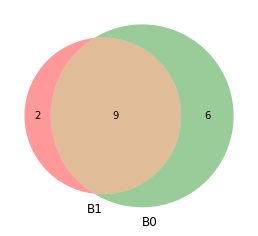

In [78]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2



B1 = set(['k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae',
       'k_bacteria|p_firmicutes|c_clostridia',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales',
       'k_bacteria|p_firmicutes',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae',
       'k_bacteria|p_proteobacteria', 'k_bacteria|p_bacteroidetes',
       'k_bacteria|p_bacteroidetes|c_bacteroidia',
       'k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales',
       'k_bacteria|p_actinobacteria|c_actinobacteria',
       'k_bacteria|p_actinobacteria'])

B0 = set(['k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum|s_subdoligranulum_unclassified',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae|g_subdoligranulum',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae',
       'k_bacteria|p_firmicutes|c_clostridia',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales',
       'k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales|f_bacteroidaceae|g_bacteroides',
       'k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales|f_bacteroidaceae',
       'k_bacteria|p_firmicutes',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae',
       'k_bacteria|p_proteobacteria', 'k_bacteria|p_bacteroidetes',
       'k_bacteria|p_bacteroidetes|c_bacteroidia',
       'k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_roseburia',
       'k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae|g_blautia'])


venn2([B1, B0], ('B1', 'B0'))

plt.show()

### Venn diagram
The venn diagram shows the overlay of the bacteria found with and without IBD. <br>
The two bacteria found only in the sick was a repeat of the same exact data. Hence there was only one bacteria the could possibly by associated with the disease. This was: Actinomycetota (only labled to the class). <br><br> 
### Actinomycosis
Actinomycetota are gram positive bacteria found in the small instestine in higher numbers. <br>
This bacteria is associated with Crohn's Disease. <br>(A Complicated Thread: Abdominal Actinomycosis in a Young Woman with Crohn Disease
Ari Nahum, Gregory Filice, Ashish Malhotra
Case Rep Gastroenterol. 2017 May-Aug; 11(2): 377–381. Published online 2017 Jun 14. doi: 10.1159/000475917
PMCID: PMC5498965)

### Healthy microbiome has more diversity. 
Most of the bacteria are shared by both populations. However, it looks as though the healthy population shows more diversity.<br> 
Unfortunately, due to poor labeling, in examples such as: 'k_bacteria|p_firmicutes' we only know up to the pylum of this feature.  This means we do not have much information on the actual organism.


## Comparing b0 and b1 using .describe() and bar plot. 

The venn diagram shows a bar chart below shows a clear difference between healthy and the sick. However, I wanted to see if there was a quantitatve difference in the mean relative abundance. 
Below, the .describe() function was informative in showing the differences between the healthy and IBD sample. <br>
Two new dataframes were made b1_describe and b0_describe.<br>
These two dataframes were then shortened to just the feature names and the means. They were plotted in a bar chart. <br>
In this bar chart we see a prominant difference between the two. 

In [79]:
b1.drop(['patient_id', 'inflammatory_bowel_disease'], axis=1, inplace=True)
b0.drop('patient_id', axis=1, inplace=True)

/Users/dahliashamir/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [80]:
b1_describe = b1.describe().T
print(type(b1_describe))
b1_describe.reset_index(inplace=True)


<class 'pandas.core.frame.DataFrame'>


In [81]:
b1_describe.rename(columns={'index': 'b1_bacteria', 'mean': 'b1_mean'}, inplace=True)

In [82]:
b1_describe.head()

,b1_bacteria,count,b1_mean,std,min,25%,50%,75%,max
0,k_bacteria|p_firmicutes|c_clostridia|o_clostri...,181.0,13.612609,8.682142,0.11862,7.80775,12.58479,18.26278,49.03319
1,k_bacteria|p_firmicutes|c_clostridia,181.0,26.993543,15.030327,2.16851,16.53843,25.98389,35.02353,80.06799
2,k_bacteria|p_firmicutes|c_clostridia|o_clostri...,181.0,26.993543,15.030327,2.16851,16.53843,25.98389,35.02353,80.06799
3,k_bacteria|p_firmicutes,181.0,29.902590,15.061847,2.67767,19.20216,28.16239,38.42724,80.33227
4,k_bacteria|p_firmicutes|c_clostridia|o_clostri...,181.0,5.290695,4.575324,0.45379,2.66655,3.93328,6.35410,37.36824


In [83]:
b0_describe = b0.describe().T
b0_describe.reset_index(inplace=True)
b0_describe.head(2)

,index,count,mean,std,min,25%,50%,75%,max
0,k_bacteria|p_firmicutes|c_clostridia|o_clostri...,569.0,7.898593,7.665944,0.01979,2.57696,5.49989,10.66447,46.51195
1,k_bacteria|p_firmicutes|c_clostridia|o_clostri...,569.0,7.906799,7.680845,0.01979,2.57696,5.49989,10.66447,46.51195


In [84]:
b0_describe.rename(columns={'index': 'b0_bacteria', 'mean': 'b0_mean'}, inplace=True)

In [88]:
b0_describe.tail(4)

,b0_bacteria,count,b0_mean,std,min,25%,50%,75%,max
11,k_bacteria|p_bacteroidetes|c_bacteroidia,569.0,58.615276,16.559352,9.12075,47.66576,59.31304,70.73502,94.47608
12,k_bacteria|p_bacteroidetes|c_bacteroidia|o_bac...,569.0,58.615276,16.559352,9.12075,47.66576,59.31304,70.73502,94.47608
13,k_bacteria|p_firmicutes|c_clostridia|o_clostri...,569.0,2.287351,2.166007,0.00847,0.91628,1.66379,2.94391,23.20334
14,k_bacteria|p_firmicutes|c_clostridia|o_clostri...,569.0,0.784877,0.671368,0.00276,0.37420,0.59733,0.98356,5.95889


### Plotting the differences using the averages found in the sick and in the healthy.

In [89]:
b1_describe_short = b1_describe[['b1_bacteria', 'b1_mean']]

In [90]:
for i in range(4):
    b1_describe_short.loc[len(b1_describe_short.index)] = ['0', 0]
    
b1_describe_short.tail(6)      

/Users/dahliashamir/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,b1_bacteria,b1_mean
9,k_bacteria|p_actinobacteria|c_actinobacteria,1.946087
10,k_bacteria|p_actinobacteria,1.946087
11,0,0.000000
12,0,0.000000
13,0,0.000000
14,0,0.000000


In [92]:
b0_describe_short = b0_describe[['b0_bacteria', 'b0_mean']] 
b0_describe_short.tail()

,b0_bacteria,b0_mean
10,k_bacteria|p_bacteroidetes,58.615731
11,k_bacteria|p_bacteroidetes|c_bacteroidia,58.615276
12,k_bacteria|p_bacteroidetes|c_bacteroidia|o_bac...,58.615276
13,k_bacteria|p_firmicutes|c_clostridia|o_clostri...,2.287351
14,k_bacteria|p_firmicutes|c_clostridia|o_clostri...,0.784877


In [96]:
b1_describe_short.head()

,b1_bacteria,b1_mean
0,k_bacteria|p_firmicutes|c_clostridia|o_clostri...,13.612609
1,k_bacteria|p_firmicutes|c_clostridia,26.993543
2,k_bacteria|p_firmicutes|c_clostridia|o_clostri...,26.993543
3,k_bacteria|p_firmicutes,29.902590
4,k_bacteria|p_firmicutes|c_clostridia|o_clostri...,5.290695


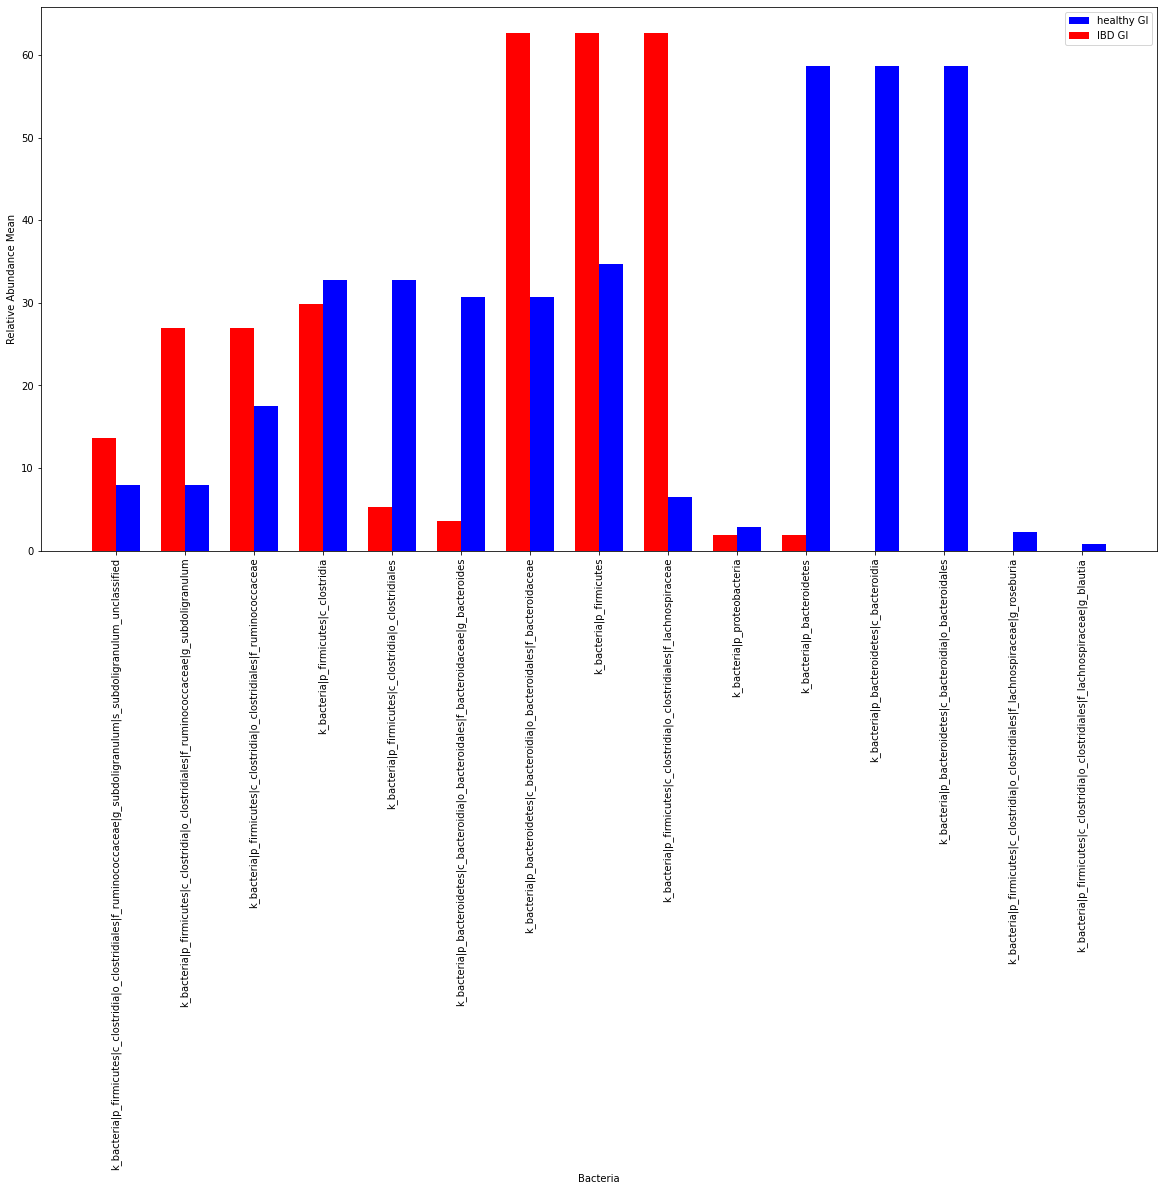

In [63]:
fig, ax = plt.subplots()

index = np.arange(len(b0_describe_short['b0_bacteria']))
bar_width = 0.35
opacity = 0.8

ax.bar(index, b0_describe_short['b0_mean'], color='b', align='edge', width=bar_width, label = 'healthy GI')
ax.bar(index, b1_describe_short['b1_mean'], color='r', align='edge', width=-bar_width,label = 'IBD GI')

# Assign the tick labels
ax.set_xticks(index)
ax.set_xticklabels(b0_describe_short['b0_bacteria'], rotation=90)

plt.xlabel('Bacteria')
plt.ylabel('Relative Abundance Mean')
plt.legend()
plt.gcf().set_size_inches(20, 10)
plt.show()

### Additional bar plots with normalized data. These also show the differenced between healthy and IBD profiles.

In [981]:
df_b_well.drop(['patient_id'], axis=1, inplace=True)
df_b_well_col = df_b_well.columns


/Users/dahliashamir/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [982]:
d = preprocessing.normalize(df_b_well)
df_b_well_scaled = pd.DataFrame(d, columns=df_b_well_col)
#df_b_well_scaled.head()

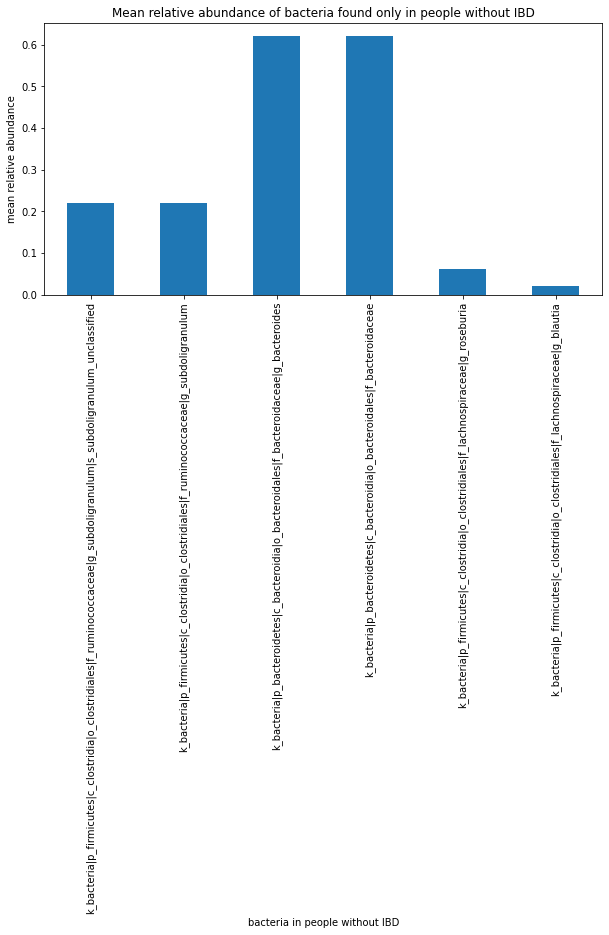

In [983]:
fig = plt.figure(figsize = (10, 5))
df_b_well_scaled.mean().plot.bar() 

plt.xlabel("bacteria in people without IBD")
plt.ylabel("mean relative abundance")
plt.title("Mean relative abundance of bacteria found only in people without IBD")

plt.show()

In [984]:
#b1.drop(['patient_id', 'inflammatory_bowel_disease'], axis=1, inplace=True)
b1_col = b1.columns
b1_col.shape

(11,)

In [985]:
d = preprocessing.normalize(b1)
b1_scaled = pd.DataFrame(d, columns=b1_col)
b1_scaled.head(2)

,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_ruminococcaceae,k_bacteria|p_firmicutes|c_clostridia,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales,k_bacteria|p_firmicutes,k_bacteria|p_firmicutes|c_clostridia|o_clostridiales|f_lachnospiraceae,k_bacteria|p_proteobacteria,k_bacteria|p_bacteroidetes,k_bacteria|p_bacteroidetes|c_bacteroidia,k_bacteria|p_bacteroidetes|c_bacteroidia|o_bacteroidales,k_bacteria|p_actinobacteria|c_actinobacteria,k_bacteria|p_actinobacteria
0,0.252710,0.483912,0.483912,0.605970,0.078413,0.050068,0.148442,0.148442,0.148442,0.113656,0.113656
1,0.012539,0.097052,0.097052,0.513892,0.027398,0.095132,0.475329,0.475329,0.475329,0.121052,0.121052


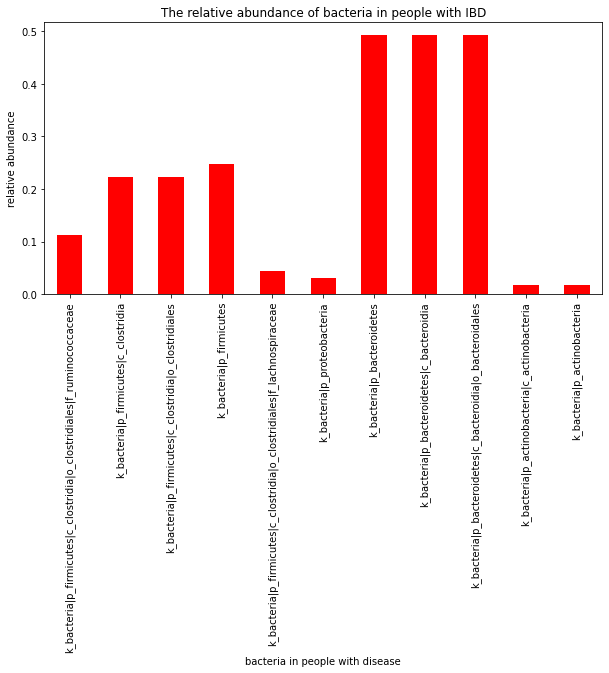

In [986]:

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
b1_scaled.mean().plot.bar(color='r') 

plt.xlabel("bacteria in people with disease")
plt.ylabel("relative abundance")
plt.title("The relative abundance of bacteria in people with IBD")
plt.show()

In [987]:
#b0.drop([ 'patient_id'], axis=1, inplace=True)
b0_col = b0.columns
b0_col.shape

(15,)

In [988]:
d = preprocessing.normalize(b0)
b0_scaled = pd.DataFrame(d, columns=b0_col)
#b0_scaled.head(10)

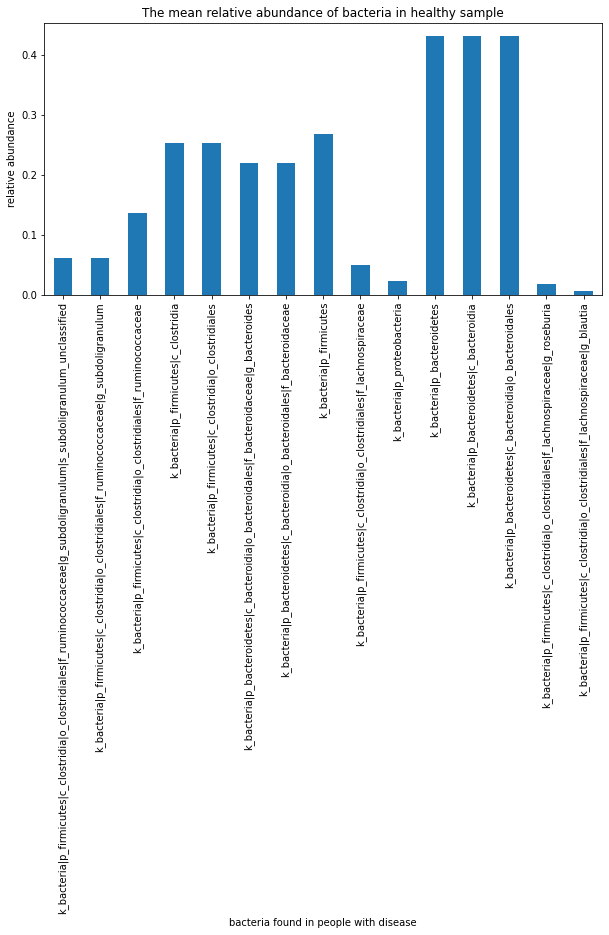

In [989]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
b0_scaled.mean().plot.bar() 

plt.xlabel("bacteria found in people with disease")
plt.ylabel("relative abundance")
plt.title("The mean relative abundance of bacteria in healthy sample")
plt.show()

#### **Outcomes literature overview**

1. Choose 2-3 bacterial features and search for their association in IBD, explain why these features were chosen. If not found than search for what the literature tells about these features in a clinical prespective
2. What are the possible mechanisms that are found/associated with these features ? How would you search for these mechanisms in computational/experimental frameworks ?

### Answers
1. As described earlier, bacteria found in the Actinomycetota phylum was found to be associated with IBD (A. Nahum, et al. 2017).
<br>
As expected, clostridia was found in both the sick and the heathly sample. C. difficile is found in the normal microflora in trace small amounts. It is also common knowledge that these are opportunistic pathogenes which can flare up when using antibiotics. Also, I thought I might come across spirochetes but none were found in this dataset. <br>

One major issue with the data is that variation in the taxonmic names. While all of them had a kingdom many had only the phylum. Therefore it was difficult to know if we were looking at the same feature multiple times. 
<br>

The more prominant data shown from this analysis were:
   1. The bacteria that were present in the healthy gut and absent from the sick ones.
   2. The decreased average of certain bacteria found in the unhealthy individuals.

The general conclusions are there were higher levels and more diverse repertiore of bacteria in the healthy individuals. In the healthy sample there were less of certain firmicutes (the phylum of clodstridium) but a larger distribution of different firmicutes. There was a slightly lower mean of proteobacteria, although the amounts of proteobacteria were small to begin with. (This might be a sparse bacteria of the intestinal lumen that could be expanded upon.) These finds is consistent with that refenrence below, which discusses the imbalanced microbiome of individuals burdened with IBD. <br>
Harris KG, Chang EB. The intestinal microbiota in the pathogenesis of inflammatory bowel diseases: new insights into complex disease. Clin Sci (Lond). 2018 Sep 18;132(18):2013-2028. doi: 10.1042/CS20171110. PMID: 30232239; PMCID: PMC6907688.
<br><br>
More striking was the presence of the phylum bacteroidetes. Bacteroides are gram negative anaerobic bacteria found throught the gastrointestinal tract. Once again, the finding that phylum, bateroidota is reduced in individuals afflicted with IBD is consistent with the literature.  <br>
Zhou Y, Zhi F. Lower Level of Bacteroides in the Gut Microbiota Is Associated with Inflammatory Bowel Disease: A Meta-Analysis. Biomed Res Int. 2016;2016:5828959. doi: 10.1155/2016/5828959. Epub 2016 Nov 24. PMID: 27999802; PMCID: PMC5143693.
<br><br>
Sparse bacteria:  Blautia and Roseburia are two genuses found in trace amounts in the intestine. They were not found in people with IBD. These are considered very good for a healthy bowel. 
<br>
Liu X, Mao B, Gu J, Wu J, Cui S, Wang G, Zhao J, Zhang H, Chen W. Blautia-a new functional genus with potential probiotic properties? Gut Microbes. 2021 Jan-Dec;13(1):1-21. doi: 10.1080/19490976.2021.1875796. PMID: 33525961; PMCID: PMC7872077.
<br>
Roseburia intestinalis: A Beneficial Gut Organism From the Discoveries in Genus and Species
Kai Nie1,2, Kejia Ma1,2, Weiwei Luo1,2, Zhaohua Shen1,2, Zhenyu Yang1,2, Mengwei Xiao1,2, Ting Tong1,2, Yuanyuan Yang1,2 and Xiaoyan Wang1,2*
<br><br><br>


Second question:
I would classify the general habitat of the bacteria in the lumen of sick and healthy stool samples. For example a chemical analysis (pH, total protein content, total lipid, etc.) could be informative. <br> Other kingdoms can be looked at for correlation with IBD. In the sample above fungi, archaea and viruses found.  <br>
Also, the diet could be quantifiable area of interest that could be analyzed computationally. Questions could be asked about the type of food/beverage consumption that could cause enviromental imbalance within the lumen. For example, heavy consumption of soft drinks.<br>
Diederen, K., Li, J.V., Donachie, G.E. et al. Exclusive enteral nutrition mediates gut microbial and metabolic changes that are associated with remission in children with Crohn’s disease. Sci Rep 10, 18879 (2020). https://doi.org/10.1038/s41598-020-75306-z
 <br><br>
 Another interesting avenue could be in the study of common genes found in the bacteria of sick candidates over the healthy ones. Finding those commonalities could be an interesting direction in the charaterization of these diseases 


# Good for you. You read to THE END :-)
Thank you, <br> Dahlia